In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
import os

In [2]:
fields = ['WFD', 'DDF']
version = '0'
size = '3000'

data1 = []

for field in fields:
    
    data_dir = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/' + field + \
                      '/results/v' + version + '/' + str(size) + \
                      '/posteriors/csv/'
    
    flist = os.listdir(data_dir)
    
    for i in range(len(flist)):
        case = flist[i].replace('chains_','').replace('_lowz_withbias.csv.gz','')
        data_temp = pd.read_csv(data_dir + flist[i])
        data_temp['field'] = field
        data_temp['case'] = case
        data1.append(data_temp)
        
data = pd.concat(data1, ignore_index=True)

In [3]:
groups = {}
groups['DDF'] = [['99.9SNIa0.1SLSN', '99.4SNIa0.6CART'], ['99SNIa1SNII', '99SNIa1SNIax', '99SNIa1SNIbc'], 
          ['98SNIa2SNII', '98SNIa2SNIax', '98SNIa2SNIbc'], ['95SNIa5SNII', '95SNIa5SNIax', '95SNIa5SNIbc'],
         ['90SNIa10SNIax'], ['72SNIa28SNII', '75SNIa25SNII']]

groups['WFD'] = [['99SNIa1AGN', '99SNIa1CART', '99SNIa1SNIa-91bg', '99SNIa1SNIax', 
                  '99SNIa1SNIbc', '99SNIa1SNII'], ['98SNIa2AGN','98SNIa2SNIa-91bg','98SNIa2SNIax', 
                 '98SNIa2SNIbc', '98SNIa2SNII'], [ '95SNIa5SNIa-91bg','95SNIa5SNIax', '95SNIa5SNIbc',
                  '95SNIa5SNII'], ['90SNIa10SNIax', '90SNIa10SNIbc','90SNIa10SNII'],['72SNIa28SNII', 
                 '75SNIa25SNII']]

In [48]:
data[flag]

,om,w,field,case
360000,0.297893,-0.984712,DDF,99.4SNIa0.6CART
360001,0.305384,-1.016942,DDF,99.4SNIa0.6CART
360002,0.306930,-1.011657,DDF,99.4SNIa0.6CART
360003,0.299487,-0.988312,DDF,99.4SNIa0.6CART
360004,0.309512,-1.032219,DDF,99.4SNIa0.6CART
...,...,...,...,...
419995,0.303195,-0.995896,DDF,99.9SNIa0.1SLSN
419996,0.293562,-0.970607,DDF,99.9SNIa0.1SLSN
419997,0.308697,-1.014368,DDF,99.9SNIa0.1SLSN
419998,0.292744,-0.982638,DDF,99.9SNIa0.1SLSN


ValueError: Could not interpret value `case` for parameter `hue`

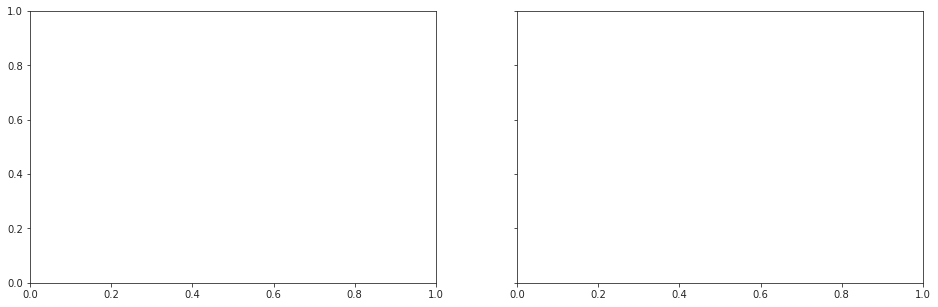

In [4]:
field = 'DDF'
i = 0

sns.set_style("ticks")

flag = np.logical_and(data['case'].isin(groups[field][i]),
                     data['field'] == 'DDF')

fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(16,5))
sns.kdeplot(data[flag], x="w", hue="case", bw_adjust=1.75)
sns.move_legend(ax, "upper left")
ax.set(xlim=[-1.25, -0.9])
ax._legend.set_bbox_to_anchor((0.1, 0.95))

plt.show()

In [2]:
data_dir = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/'
size = 3000
version = '0'

posteriors = {}
density = {}
for field in ['DDF']:
    
    density[field] = {}
    posteriors[field] = {}
    
    for case in ['perfect']:
        
        posteriors[field][size] = {}
        posteriors[field][size]['fiducial'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) +\
                                                '/posteriors/csv/chains_fiducial' + str(size) + '_lowz_withbias.csv.gz')
        posteriors[field][size]['random'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) + \
                                                '/posteriors/csv/chains_random' + str(size) + '_lowz_withbias.csv.gz')
        posteriors[field][size]['perfect'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) + \
                                                '/posteriors/csv/chains_perfect' + str(size) + '_lowz_withbias.csv.gz')
    
        density[field][size] = {}
        density[field][size]['fiducial'] = stats.kde.gaussian_kde(posteriors[field][size]['fiducial']['w'], bw_method=0.3)
        density[field][size]['random'] = stats.kde.gaussian_kde(posteriors[field][size]['random']['w'], bw_method=0.3)
        density[field][size]['perfect'] = stats.kde.gaussian_kde(posteriors[field][size]['perfect']['w'], bw_method=0.3)

In [4]:
density

{'DDF': {3000: {'fiducial': <scipy.stats.kde.gaussian_kde at 0x7f52d98fc978>,
   'random': <scipy.stats.kde.gaussian_kde at 0x7f52d989bdd8>,
   'perfect': <scipy.stats.kde.gaussian_kde at 0x7f52d989bf28>}}}

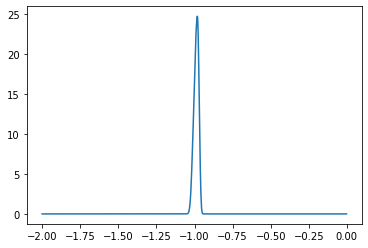

In [3]:
xaxis = np.arange(-2,0,0.002)

plt.figure()
plt.plot(xaxis, density['DDF'][3000]['perfect'].evaluate(xaxis))
plt.show()